In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
wine=pd.read_csv("D:\\EXCEL R\\ASSIGNMENTS\\PCA\\wine.csv")
print(wine.head())
print(wine.tail())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5       

In [3]:
wine.shape

(178, 14)

In [4]:
wine.info()
wine['Type'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


dtype('int64')

In [5]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [18]:
wine.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


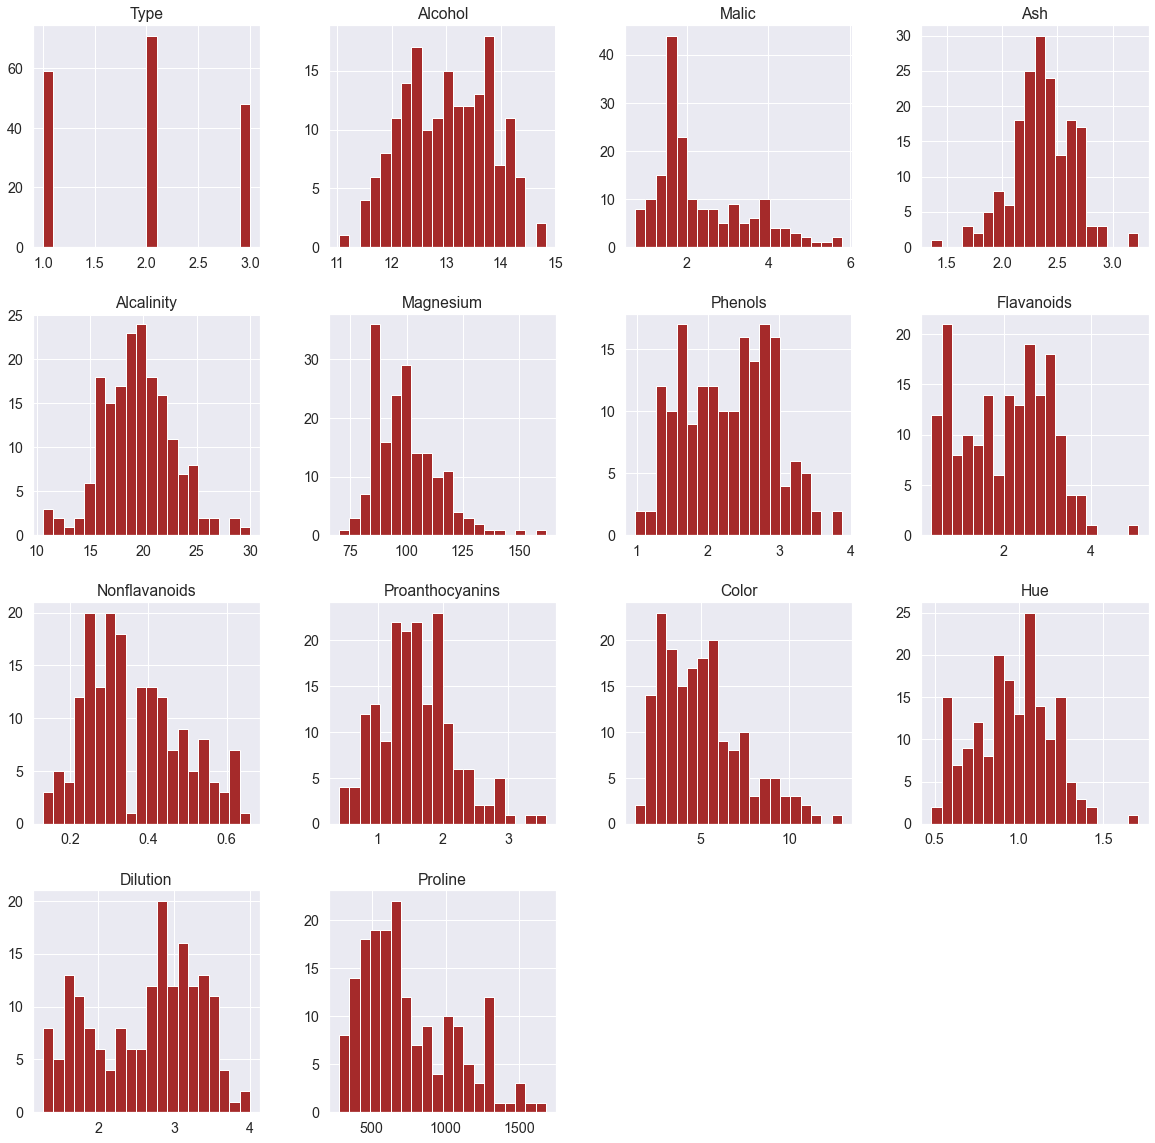

In [7]:
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=wine.hist(bins=20,color='brown' )

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = wine.copy()
data_scaled[data_scaled.columns]=scaler.fit_transform(data_scaled)

In [11]:
data_scaled

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [12]:
data_scaled.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.596725e-16,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-1.213944e+00,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,7.996036e-02,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,1.373864e+00,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,1.373864e+00,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


<AxesSubplot:>

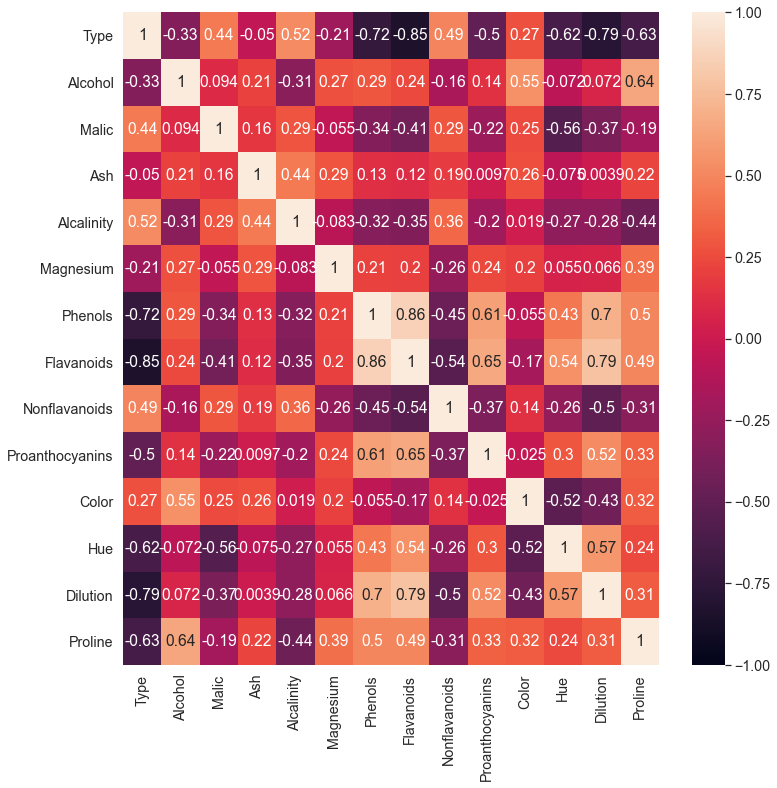

In [17]:

plt.figure(figsize=(12,12))
sns.heatmap(data_scaled.corr(), vmin=-1, vmax=1, annot=True)

In [19]:
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

In [20]:
pca.get_covariance()

array([[ 1.00564972, -0.3300763 ,  0.44024952, -0.04992369,  0.52078487,
        -0.21036119, -0.72322641, -0.85228566,  0.49187249, -0.50194977,
         0.26716852, -0.62085717, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09493026,  0.21273976, -0.31198788,
         0.27232816,  0.29073446,  0.23815287, -0.15681042,  0.13747022,
         0.549451  , -0.07215255,  0.07275191,  0.64735687],
       [ 0.44024952,  0.09493026,  1.00564972,  0.16497228,  0.29013035,
        -0.05488343, -0.3370606 , -0.41332866,  0.29463237, -0.22199334,
         0.25039204, -0.56446685, -0.37079354, -0.19309537],
       [-0.04992369,  0.21273976,  0.16497228,  1.00564972,  0.44587209,
         0.28820583,  0.12970824,  0.11572743,  0.1872826 ,  0.00970647,
         0.2603499 , -0.07508874,  0.00393333,  0.22488969],
       [ 0.52078487, -0.31198788,  0.29013035,  0.44587209,  1.00564972,
        -0.0838039 , -0.32292752, -0.353355  ,  0.36396647, -0.19844168,
         0.01883781, -0.27

In [21]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [22]:
var.shape

(14,)

In [23]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

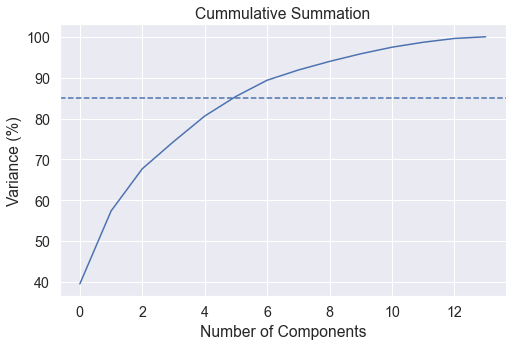

In [24]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (8,5))
plt.plot(var1)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Cummulative Summation')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=85, color='b', linestyle='--')
plt.show()

In [26]:
pca2 = PCA(n_components = 3).fit(data_scaled)
pca_values = pca.fit_transform(data_scaled)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 67.71%


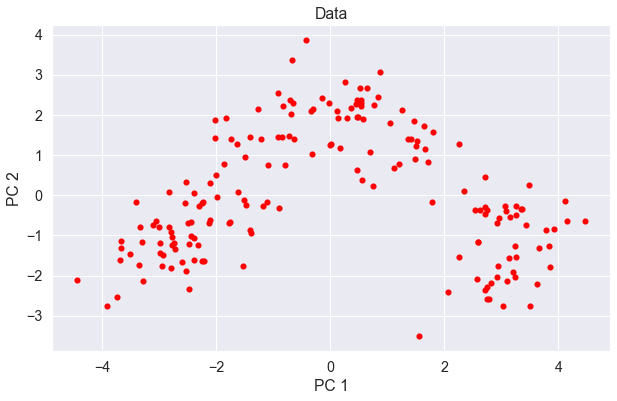

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x=pca_values[:, 0], y=pca_values[:, 1], color='red',lw=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data')
plt.show()


Text(0, 0.5, 'wcss')

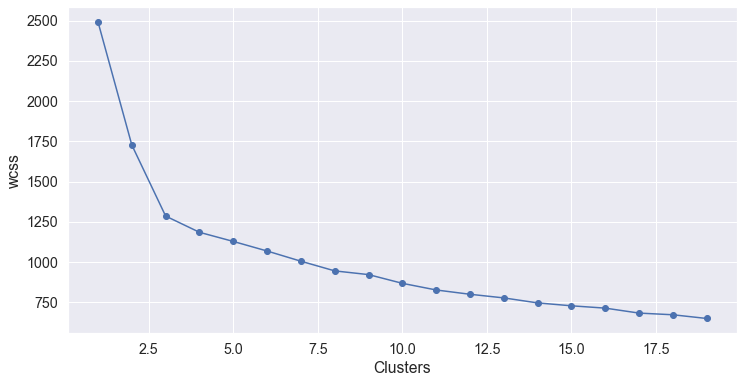

In [32]:
from sklearn.cluster import KMeans

wcss = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(pca_values)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'wcss':wcss})
plt.plot(frame_scaled['Cluster'], frame_scaled['wcss'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("wcss")

In [33]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=9)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [37]:
frame = pd.DataFrame(data_scaled)
wine['cluster'] = pred

wine['cluster'].value_counts()

0    68
1    61
2    49
Name: cluster, dtype: int64

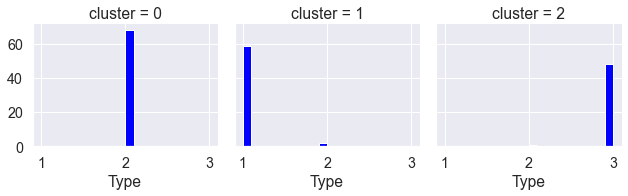

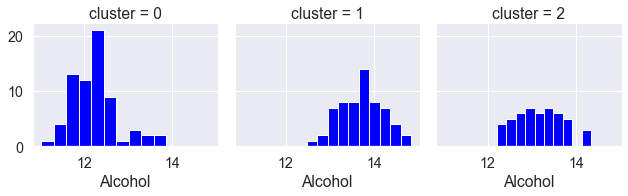

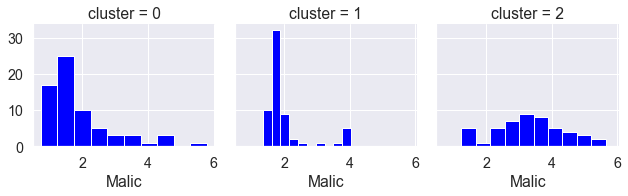

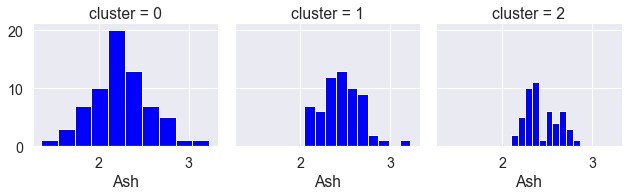

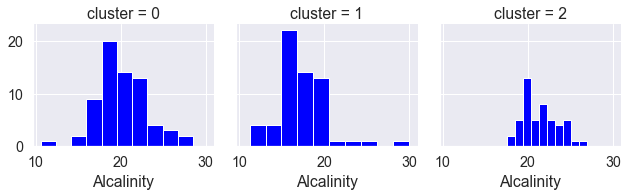

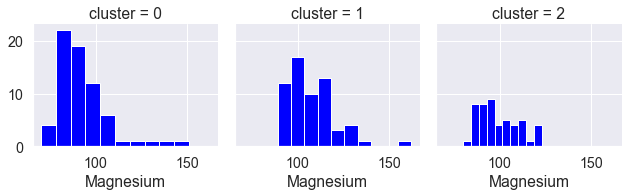

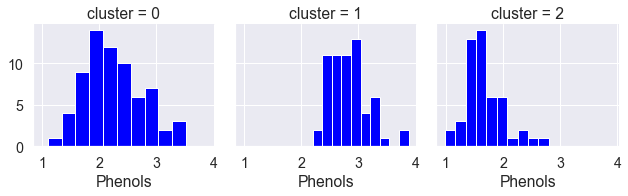

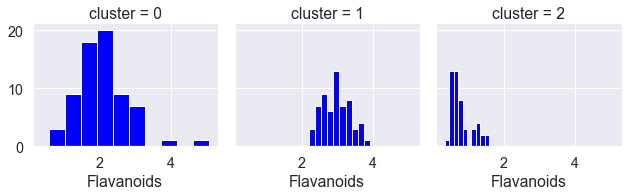

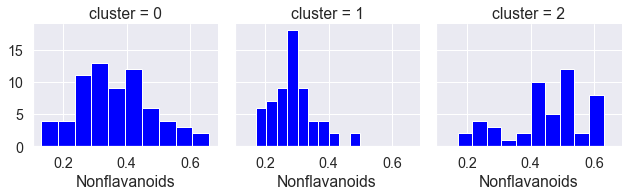

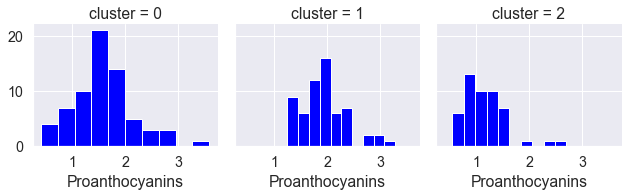

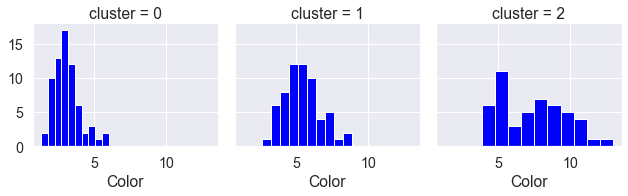

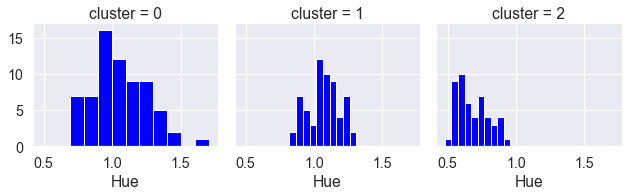

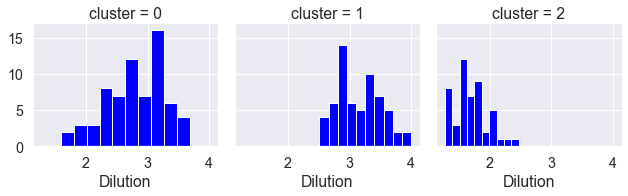

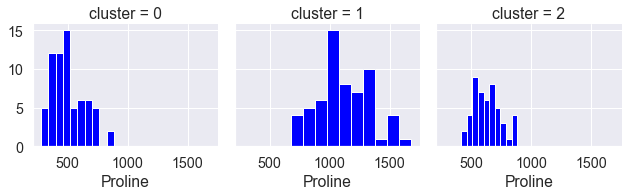

In [40]:
a=wine.columns.tolist()
a[0:len(a)-1]

for cluster in a[0:len(a)-1]:
    grid= sns.FacetGrid(wine, col='cluster')
    grid.map(plt.hist, cluster,color='blue')